In [4]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import scipy.special


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Example 1: log scaled plots
Suppose we are plotting
$$y = f(x).$$
Log plots are useful when either $x$ and/or $y$ range over several orders of magnitude (factors of 10). In our error and convergence plots, both $x$ and $y$ range over many factors of 10, so we use log scales on both axes. Below is an example that compares the linear scale (left), the plot of $\log(y)$ vs $\log(x)$ (middle), and using the `loglog()` Python plotting function (right). 

The difference between plotting of $\log(y)$ vs $\log(x)$ and using the `loglog()` Python plotting function is the how the $x$ and $y$ axis get labeled. (Notice that the actual curves are identical in shape.) The `loglog()` Python plotting function labels the y-axis with the values of $y$ even thought it is plotting the curve $\log(y)$ and likewise for $x$. Since the $\log()$ function is not a linear function, the tick marks on the scales are not evenly spaced.

Let $s = \log(x)$ so that $x = e^s$. For a function $f(x) = x^m$, $m\geq 1$, the effect of a *double* logarithmic scale is a curve identical in shape to $\log(x^m) = \log(e^{ms}) = ms$. Hence, this type of function appears linear, with the exponent $m$ determining the slope of the line.

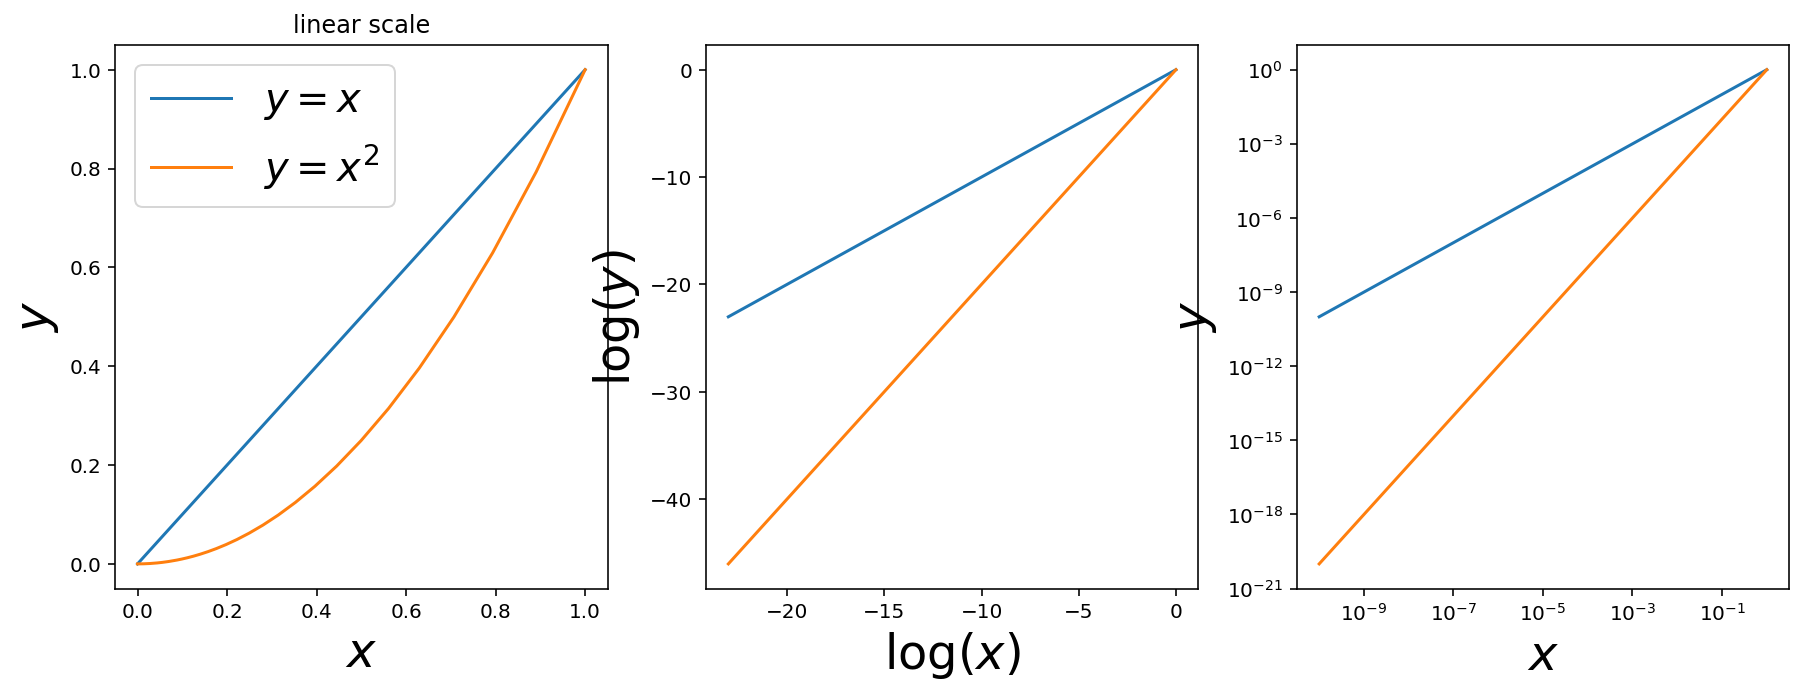

In [3]:
x = logspace(-10, 0, 200)
y1 = x
y2 = x**2

fig = figure(1, [15, 5])

fig.add_subplot(131)
plot(x, y1, label='$y=x$')
plot(x, y2, label='$y=x^2$')
title('linear scale')
legend(fontsize=20) ## figure legend, uses the optional `label=''` parameter in the plot commands
                    ## note that these labels use LaTeX, so are of the form `'$ some math $'`
                    ## sometime LaTeX symbols confuse Python, so it is better to use `r'$ some math$'`
xlabel(r'$x$', fontsize=24) ## x axis label
ylabel(r'$y$', fontsize=24) ## y axis label

fig.add_subplot(132)
plot(log(x), log(y1))
plot(log(x), log(y2))
xlabel(r'$\log(x)$', fontsize=24) ## x axis label
ylabel(r'$\log(y)$', fontsize=24) ## y axis label

fig.add_subplot(133)
loglog(x, y1)
loglog(x, y2)
xlabel(r'$x$', fontsize=24) ## x axis label
ylabel(r'$y$', fontsize=24); ## y axis label

# Example 2: finite difference error
Suppose we are interested in computing a numerical approximation to the derivative of
$$ f(x) = \sin(x).$$
Of course, we know what the derivative is already, namely,
$$ f'(x) = \cos(x).$$
We often use a test problem like this, where we know the exact answer, to explore numerical approximation methods.

Our goal is to derive a numerical scheme for computing an approximation of the derivative of a function, using only values of the function at two or more points. Recall that the definition of the derivative is
$$ f'(x) = \lim_{h\to0} \frac{f(x+h) - f(x)}{h}. $$
Of course, we cannot take a limit with a computer. There is a limit to how small we can make $h$ on a computer.
To derive a numerical approximation, we could simply take the constant $h > 0$ to be some small fixed value. Then, an approximation of the derivative is
$$ f'(x) \approx \frac{f(x+h) - f(x)}{h}.$$

What error do we make by using $h>0$ small but not considering the limit $h\to 0$? The absolute error in our approximation is given by
$$\mathcal{E}_{\rm abs} = \left \vert\frac{f(x+h) - f(x)}{h} - f'(x) \right \vert. $$
To derive the error, we expand our function in a Taylor's series, with
$$ f(x + h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + O(h^3). $$
Substituting the Taylor's series into the absolute error yields
\begin{align*}
\mathcal{E}_{\rm abs} &= \left \vert
\frac{1}{h}\left(hf'(x) + \frac{h^2}{2}f''(x) + O(h^3)\right) - f'(x) \right \vert \\
  &= \left \vert f'(x) + \frac{h}{2}f''(x) + O(h^2) - f'(x)\right \vert \\
  &= \left \vert  \frac{h}{2}f''(x) + O(h^2) \right \vert \\
  &= \frac{h}{2}\left \vert  f''(x)\right \vert + O(h^2) 
\end{align*}


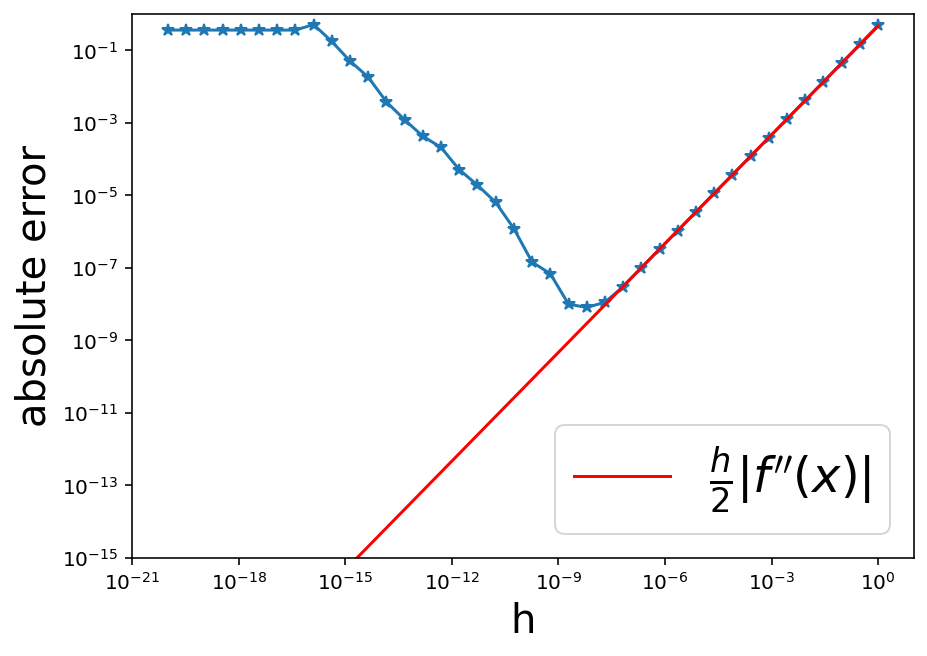

In [3]:
x0 = 1.2 ## point that we compute the derivative at (ie d/dx sin(x) at x = x0)
f0 = sin(x0) ## f(x0)
fp = cos(x0) ## f'(x0) the `p` means 'prime'
fpp = -sin(x0) ## f''(x0)
i = linspace(-20, 0, 40) ## `linspace` gives a range of values between two end points
##                          in this case 40 points, between -20 and 0
h = 10.0**i ## this is our approx parameter, it is an array of values 
##             between 10^(-20) and 10^(0)
fp_approx = (sin(x0 + h) - f0)/h ## the derivative approximation
err = absolute(fp - fp_approx) ## the full absolute error
d_err = h/2*absolute(fpp) ## the formula for the discretization error, derived above
            
figure(1, [7, 5]) ## creates a blank figure 7 inches (wide) by 5 inches (height)
loglog(h, err, '-*') ## makes a plot with a log scale on both the x and y axis
loglog(h, d_err, 'r-', label=r'$\frac{h}{2}\vert f^{\prime\prime}(x) \vert $')
xlabel('h', fontsize=20) ## puts a label on the x axis
ylabel('absolute error', fontsize=20) ## puts a label on the y axis
ylim(1e-15, 1) ## places limits on the yaxis for our plot
legend(fontsize=24); ## creates a figure legend (uses the `label=...` arguments in the plot command)

For $h$ small but not too small, the absolute error is dominated by the discretization error, $\frac{h}{2}\vert f''(x) \vert$, which is larger than other sources of error such as roundoff error. Once $h < 10^{-8}$, the discretization error becomes smaller than the roundoff error, and the roundoff error continues to get larger as $h\to 0$.

# Example 3: floating point overflow and underflow
## We encounter both overflow and underflow when working with the Binomial distribution
The Binomial distribution is give by
$$ P(k \mid n, p) = \binom{n}{k}p^k(1-p)^{n-k}$$

In [4]:
from scipy.special import gamma, loggamma

def dbinomial(k, n, p):
    return gamma(n + 1)/gamma(k + 1)/gamma(n - k + 1)*p**k*(1 - p)**(n-k)

## We can create a more stable version of our function with the following
## The strategy is to compute log(P) first and then return exp(log(P))
## We make use of the built in function loggamma(x) = log(gamma(x))
def dbinomial_2(k, n, p):
    log_prob = loggamma(n + 1) - loggamma(k + 1) - loggamma(n - k + 1) + k*log(p) + (n-k)*log(1-p)
    return exp(log_prob)


print(dbinomial(15, 20, 0.01)) # everything is fine with these values
print('----------------------')

print(dbinomial(100, 200, 0.5)) # overflow in the `gamma` function
print(gamma(200), 0.5**100) # overflow but not underflow
print('corrected version:', dbinomial_2(100, 200, 0.5)) # true value is not very small or large!!

print('----------------------')
print(dbinomial(15, 200, 0.01)) 
print(gamma(200), 1/gamma(200-15), 0.01**(200 - 15)) ## overflow and underflow, 0*inf = nan
print('corrected version:', dbinomial_2(15, 200, 0.01))

1.4744149733649604e-26
----------------------
inf
inf 7.888609052210118e-31
corrected version: 0.0563484790092559
----------------------
nan
inf 0.0 0.0
corrected version: 2.278966811808424e-09


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


# Example 4: Floating point numbers
## Largest and smallest absolute values
Note that the real smallest absolute value is much smaller than our theoretical limit due to **subnormal numbers**, which we will not study in this class.

In [5]:
## For float64
## find smallest (approximate) value that causes overflow
x64_largest = 2.*2.**1023
## find the largest (approximate) value that caues underflow
x64_smallest = 1e-324
print(x64_largest, x64_smallest)

inf 0.0


In [6]:
## For float32
## find smallest (approximate) value that causes overflow
x32_largest = float32(2.*2.**127)
## find the largest (approximate) value that caues underflow
x32_smallest = float32(1.)/float32(1e38)/float32(1e8) 
print(x32_largest, x32_smallest)

inf 0.0
